#### Importando as bibliotecas de python para Análise Exploratória do Dataset

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

#### Importando o Dataset

In [4]:
Dados=pd.read_csv('cars_Brazil_data.csv')

In [42]:
Dados.columns

Index(['nome', 'valor', 'marca', 'categoria', 'loc', 'ano', 'km_rodados'], dtype='object')

#### Excluindo todos os elementos do Dataset com menos de 500 ocorrências
Isso é feito pois posteriormente, o Dataset será dividido em vários Datasets individuais para cada elemento, e esses por sua vez serão divididos em teste e treinamento, sendo que o treinamento possui 10% do tamanho do Dataset individual, para que a base de treinamento não fique excessivamente reduzida, podendo gerar viés, a opção utilizada foi limitar ela a no mínimo 50 elementos

In [5]:
Mais_de500 = Dados['nome'].value_counts() > 500
Mais_de500 = list(Mais_de500.loc[Mais_de500].index)
Dados = Dados.loc[Dados['nome'].isin(Mais_de500),:];

#### Explorando as variáveis do Dataset:

Variáveis quantitativas:

In [36]:
Dados.describe()

,valor,ano,km_rodados
count,30637.000000,30637.000000,30537.000000
mean,45008.017104,2015.236152,58509.811114
std,21484.692956,3.704407,48210.134017
min,5000.000000,1982.000000,0.000000
25%,33000.000000,2013.000000,29701.000000
50%,39900.000000,2016.000000,46000.000000
75%,51890.000000,2018.000000,83000.000000
max,225000.000000,2020.000000,500000.000000


Variáveis qualitaivas

In [37]:
Dados['nome'].describe()

count              30637
unique                32
top       CHEVROLET ONIX
freq                2160
Name: nome, dtype: object

In [38]:
Dados['marca'].describe()

count     30637
unique       11
top        FORD
freq       5630
Name: marca, dtype: object

In [39]:
Dados['categoria'].describe()

count     30637
unique       13
top       Hatch
freq      23259
Name: categoria, dtype: object

In [40]:
Dados['loc'].describe()

count     30637
unique       24
top          SP
freq      20866
Name: loc, dtype: object

#### Separando em Datasets Individuais

In [6]:
def f(x):
    return Dados.loc[Dados['nome'] == x]
interact(f, x = Mais_de500);

interactive(children=(Dropdown(description='x', options=('CHEVROLET ONIX', 'RENAULT SANDERO', 'FORD KA', 'HYUN…

In [7]:
def g(x):
    dispersão = plt.scatter (Dados.loc[Dados['nome'] == x]['valor'],Dados.loc[Dados['nome'] == x]['km_rodados'])
    return dispersão
interact(g, x = Mais_de500);

interactive(children=(Dropdown(description='x', options=('CHEVROLET ONIX', 'RENAULT SANDERO', 'FORD KA', 'HYUN…

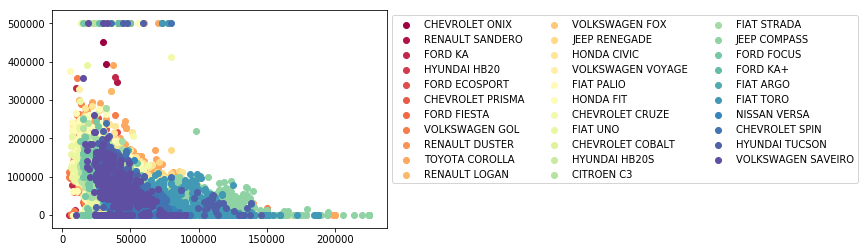

In [27]:
cmap = plt.cm.get_cmap('Spectral')
t=0
for x in Mais_de500:
    plt.scatter (Dados.loc[Dados['nome'] == x]['valor'],Dados.loc[Dados['nome'] == x]['km_rodados'],
                 label=x, c=[cmap(t * 1/(len(Mais_de500)-1))])
    t+=1
    plt.legend(ncol=3,bbox_to_anchor=(1,1, 0, 0));

In [8]:
varia = {}
for x in Mais_de500:
    varia[x] = Dados.loc[Dados['nome'] == x]